In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


* 전처리 한 것 불러오기

참고로 amount, inout, weather는 1년 전으로 맞춰놓음

In [ ]:
import pandas as pd
price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/price2.csv')
amount = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/amount2.csv')
top = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/시군산지_기후관측소기준 TOP39.csv')
inout = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/inout.csv')
weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/weather2.csv')

In [ ]:
amount['연'].unique()

array([14, 15, 16, 17, 18, 19, 20, 21, 22])

In [ ]:
inout['year'].unique()

array([17, 18, 19, 20, 21, 22])

In [ ]:
weather.info()

### merge

* 하나씩 기준에 따라 합치기

In [ ]:
price.head()

,품종,시장,법인,광역산지,시군산지,도매가격(원/kg),연,월
0,양파(일반),대구북부도매,대양청과,경북,영천,793.00,21,10
1,양파(일반),대구북부도매,효성청과,경북,의성,803.03,21,10
2,양파(일반),대구북부도매,대양청과,경남,합천,769.69,21,10
3,양파(일반),대구북부도매,대양청과,대구,대구중구,735.00,21,10
4,양파(일반),대구북부도매,효성청과,경북,영천,843.43,21,10


In [ ]:
amount.head()

,재배면적,재배비율,생산량,연,광역산지
0,0,0,0,14,서울
1,23,8265,1901,14,부산
2,81,6909,5596,14,대구
3,25,2294,573,14,인천
4,58,7443,4317,14,광주


In [ ]:
PA = pd.merge(price, amount, on = ['연', '광역산지'])
PA.head()

,품종,시장,법인,광역산지,시군산지,도매가격(원/kg),연,월,재배면적,재배비율,생산량
0,양파(일반),대구북부도매,대양청과,경북,영천,793.00,21,10,2365,8098,191509
1,양파(일반),대구북부도매,효성청과,경북,의성,803.03,21,10,2365,8098,191509
2,양파(일반),대구북부도매,효성청과,경북,영천,843.43,21,10,2365,8098,191509
3,양파(일반),대구북부도매,대양청과,경북,성주,781.82,21,10,2365,8098,191509
4,양파(일반),대구북부도매,대양청과,경북,고령,800.00,21,10,2365,8098,191509


In [ ]:
top.head()

,시군산지,기후관측소기준
0,무안,목포
1,함평,영광
2,창녕,밀양
3,신안,목포
4,합천,합천


In [ ]:
top['기후관측소기준'].unique()

array(['목포', '영광', '밀양', '합천', '제주', '서울', '산청', '영천', '고흥', '해남', '의성',
       '추풍령', '부여', '부안', '문경', '대구', '서귀포', '고창', '전주', '의령군', '서산',
       '군산', '장흥', '북창원', '영주', '안동', '여수', '광주', '강진군', '부산', '구미', '거창'],
      dtype=object)

In [ ]:
TOP39 = PA[PA['시군산지'].str.contains('무안|함평|창녕|신안|합천|제주|구리|함양|영천|고흥|해남|\
       |고령|의성|김천|논산|부안|문경|달성|군위|서귀포|고창|완주|\
       |의령|서산|익산|장흥|경산|밀양|창원의창|대구중구|영주|안동|\
       |여수|나주|광주서구|영암|연제|구미|거창')]
idx_천안동남 = TOP39[TOP39['시군산지'] == '천안동남'].index
TOP39.drop(idx_천안동남, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
TOP39['시군산지'].unique()

array(['영천', '의성', '고령', '구미', '군위', '안동', '문경', '영주', '김천', '경산', '합천',
       '밀양', '창녕', '함양', '의령', '창원의창', '거창', '대구중구', '달성', '무안', '해남',
       '함평', '신안', '영암', '나주', '고흥', '여수', '장흥', '광주서구', '고창', '완주', '익산',
       '부안', '구리', '연제', '서산', '논산', '제주', '서귀포'], dtype=object)

In [ ]:
PAT = pd.merge(TOP39, top, on = ['시군산지'])
PAT.head()

,품종,시장,법인,광역산지,시군산지,도매가격(원/kg),연,월,재배면적,재배비율,생산량,기후관측소기준
0,양파(일반),대구북부도매,대양청과,경북,영천,793.00,21,10,2365,8098,191509,영천
1,양파(일반),대구북부도매,효성청과,경북,영천,843.43,21,10,2365,8098,191509,영천
2,기타,포항도매,대구경북능금원협,경북,영천,725.00,21,10,2365,8098,191509,영천
3,양파(일반),대구북부도매,대양청과,경북,영천,804.59,21,9,2365,8098,191509,영천
4,양파(일반),대구북부도매,효성청과,경북,영천,890.58,21,9,2365,8098,191509,영천


In [ ]:
PAT.columns = ['kind', 'market', 'corp', 'wide', 'city', 'price', 'year', 'month', 'area', 'ratio', 'amount', 'weather']
PAT.head()

,kind,market,corp,wide,city,price,year,month,area,ratio,amount,weather
0,양파(일반),대구북부도매,대양청과,경북,영천,793.00,21,10,2365,8098,191509,영천
1,양파(일반),대구북부도매,효성청과,경북,영천,843.43,21,10,2365,8098,191509,영천
2,기타,포항도매,대구경북능금원협,경북,영천,725.00,21,10,2365,8098,191509,영천
3,양파(일반),대구북부도매,대양청과,경북,영천,804.59,21,9,2365,8098,191509,영천
4,양파(일반),대구북부도매,효성청과,경북,영천,890.58,21,9,2365,8098,191509,영천


In [ ]:
PAT[PAT['weather']=='영광']

,kind,market,corp,wide,city,price,year,month,area,ratio,amount,weather
19307,저장양파,서울가락도매,한국청과,전남,함평,803.29,21,10,5743,7883,452737,영광
19308,저장양파,서울가락도매,동화청과,전남,함평,809.60,21,10,5743,7883,452737,영광
19309,만생양파,서울가락도매,서울청과,전남,함평,767.85,21,10,5743,7883,452737,영광
19310,만생양파,광주각화도매,광주중앙청과,전남,함평,812.74,21,10,5743,7883,452737,영광
19311,양파(일반),서울강서도매,농협강서,전남,함평,1280.16,21,9,5743,7883,452737,영광
...,...,...,...,...,...,...,...,...,...,...,...,...
20998,저장양파,서울가락도매,동화청과,전남,함평,667.36,14,2,10124,5730,580151,영광
20999,기타,서울가락도매,중앙청과,전남,함평,646.19,14,1,10124,5730,580151,영광
21000,기타,서울강서도매,서부청과,전남,함평,718.19,14,1,10124,5730,580151,영광
21001,저장양파,서울가락도매,한국청과,전남,함평,718.82,14,1,10124,5730,580151,영광


In [ ]:
PAT.dtypes

kind        object
market      object
corp        object
wide        object
city        object
price      float64
year         int64
month        int64
area         int64
ratio        int64
amount       int64
weather     object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder1 = LabelEncoder()
PAT['kind'] = encoder1.fit_transform(PAT.kind)

In [ ]:
print(encoder1.classes_)

['기타' '깐양파' '만생양파' '양파(수입)' '양파(일반)' '양파(임시)' '자주양파' '저장양파' '조생양파' '중만생양파'
 '중생양파']


In [ ]:
encoder2 = LabelEncoder()
PAT['market'] = encoder2.fit_transform(PAT.market)

In [ ]:
encoder3 = LabelEncoder()
PAT['corp'] = encoder3.fit_transform(PAT.corp)

In [ ]:
encoder4 = LabelEncoder()
PAT['wide'] = encoder4.fit_transform(PAT.wide)

In [ ]:
encoder5 = LabelEncoder()
PAT['city'] = encoder5.fit_transform(PAT.city)

In [ ]:
print(encoder5.classes_)

['거창' '경산' '고령' '고창' '고흥' '광주서구' '구리' '구미' '군위' '김천' '나주' '논산' '달성' '대구중구'
 '무안' '문경' '밀양' '부안' '서귀포' '서산' '신안' '안동' '여수' '연제' '영암' '영주' '영천' '완주'
 '의령' '의성' '익산' '장흥' '제주' '창녕' '창원의창' '함양' '함평' '합천' '해남']


In [ ]:
inout.head()

,inn,out,year,month
0,24407.001,1.000,17,1
1,1417.701,26.206,17,10
2,2110.050,10.300,17,11
3,2619.802,4.100,17,12
4,6681.080,0.305,17,2


In [ ]:
PATI = pd.merge(PAT, inout, on = ['year', 'month'])
PATI.head()

,kind,market,corp,wide,city,price,year,month,area,ratio,amount,weather,inn,out
0,4,5,23,2,26,793.00,21,10,2365,8098,191509,영천,5213.902,7.88
1,4,5,79,2,26,843.43,21,10,2365,8098,191509,영천,5213.902,7.88
2,0,31,20,2,26,725.00,21,10,2365,8098,191509,영천,5213.902,7.88
3,4,5,79,2,29,803.03,21,10,2365,8098,191509,의성,5213.902,7.88
4,4,9,34,2,29,785.80,21,10,2365,8098,191509,의성,5213.902,7.88


In [ ]:
PATI[PATI['weather'] == '영광']

,kind,market,corp,wide,city,price,year,month,area,ratio,amount,weather,inn,out
94,7,10,75,6,36,803.29,21,10,5743,7883,452737,영광,5213.902,7.88
95,7,10,30,6,36,809.60,21,10,5743,7883,452737,영광,5213.902,7.88
96,2,10,37,6,36,767.85,21,10,5743,7883,452737,영광,5213.902,7.88
97,2,1,5,6,36,812.74,21,10,5743,7883,452737,영광,5213.902,7.88
450,4,11,11,6,36,1280.16,21,9,5743,7883,452737,영광,3378.003,2.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25101,2,10,75,6,36,1062.24,17,1,9521,5981,569472,영광,24407.001,1.00
25102,6,10,75,6,36,448.81,17,1,9521,5981,569472,영광,24407.001,1.00
25103,6,10,60,6,36,567.96,17,1,9521,5981,569472,영광,24407.001,1.00
25104,6,10,30,6,36,576.23,17,1,9521,5981,569472,영광,24407.001,1.00


In [ ]:
weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/weather2.csv')

In [ ]:
weather.head()

,weather,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,HT_10,HT_11,HT_12,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,LT_10,LT_11,LT_12,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12,year
0,강릉,-0.1,0.4,5.7,13.3,17.6,20.6,25.3,25.1,20.2,15.8,7.8,-0.1,4.1,5.1,9.6,18.3,21.9,24.1,28.9,28.4,24.1,20.8,12.3,4.4,-3.2,-3.8,1.9,8.6,13.6,17.5,22.1,22.3,16.9,11.4,4.0,-3.8,39.0,23.1,126.7,126.5,52.7,26.8,261.2,295.3,290.7,10.6,25.6,43.2,196.6,208.4,180.2,211.1,219.3,121.2,182.7,91.5,176.7,232.3,203.6,194.9,13
1,강릉,-0.5,1.8,7.4,10.8,18.1,21.5,27.0,28.5,20.8,15.8,8.8,3.1,4.0,6.7,12.2,15.3,23.1,25.0,30.7,32.5,24.6,20.4,13.1,7.2,-4.3,-2.5,2.7,6.1,13.6,18.4,23.9,25.3,17.7,11.9,4.8,-0.3,54.6,13.6,81.8,58.0,78.7,36.0,241.9,54.6,135.5,130.8,9.8,26.4,194.3,203.0,238.7,229.7,244.4,173.6,166.0,240.5,142.8,193.5,214.3,197.9,14
2,강릉,2.3,1.3,8.3,14.1,20.0,20.9,26.1,23.7,20.9,15.9,10.5,1.1,6.4,5.3,12.7,18.7,24.8,24.3,30.1,26.7,25.1,20.6,14.5,5.6,-2.0,-1.8,3.6,9.5,14.9,17.9,22.5,20.9,17.4,11.8,6.8,-3.2,45.6,169.4,55.3,189.3,9.9,55.7,109.5,336.9,212.1,120.2,84.5,0.4,183.3,107.9,192.9,190.7,259.0,122.5,220.7,123.9,189.9,206.1,173.5,227.9,15
3,강릉,2.2,3.1,8.2,12.1,20.0,21.0,23.8,25.8,20.2,16.0,9.9,4.9,6.4,7.4,13.4,16.7,25.1,25.1,27.2,29.7,24.4,21.0,12.9,8.9,-1.5,-0.6,2.9,7.5,14.8,17.2,20.7,22.4,16.6,11.5,7.2,1.6,20.4,13.1,22.1,76.8,3.1,175.0,62.9,224.8,70.0,21.0,348.9,9.3,185.5,186.3,277.1,188.8,288.3,184.0,173.7,235.7,206.3,255.4,97.7,174.2,16
4,강릉,0.4,1.9,7.9,14.1,19.3,21.9,24.1,25.8,20.6,15.6,9.1,5.0,4.7,6.0,12.4,19.3,24.9,25.9,27.6,29.8,24.3,19.8,13.6,9.2,-3.1,-1.6,3.7,9.2,14.2,18.3,21.2,22.2,17.6,12.2,4.7,1.2,27.4,48.5,29.3,73.0,33.6,40.7,424.2,282.6,104.8,78.1,33.5,82.5,232.8,213.9,207.0,237.6,285.9,205.1,141.2,235.5,125.4,151.3,189.8,183.9,17


In [ ]:
weather['year'].unique()

array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22])

In [ ]:
PATIW = pd.merge(PATI, weather, on = ['year', 'weather'])
PATIW.head()

,kind,market,corp,wide,city,price,year,month,area,ratio,amount,weather,inn,out,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,HT_10,HT_11,HT_12,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,LT_10,LT_11,LT_12,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12
0,4,5,23,2,26,793.00,21,10,2365,8098,191509,영천,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
1,4,5,79,2,26,843.43,21,10,2365,8098,191509,영천,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
2,0,31,20,2,26,725.00,21,10,2365,8098,191509,영천,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
3,4,5,23,2,26,804.59,21,9,2365,8098,191509,영천,3378.003,2.20,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
4,4,5,79,2,26,890.58,21,9,2365,8098,191509,영천,3378.003,2.20,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4


In [ ]:
PATIW = PATIW[['price', 'weather', 'kind', 'market', 'corp', 'wide', 'city', 'year', 'month',
       'area', 'ratio', 'amount', 'inn', 'out', 'AT_1', 'AT_2',
       'AT_3', 'AT_4', 'AT_5', 'AT_6', 'AT_7', 'AT_8', 'AT_9', 'AT_10',
       'AT_11', 'AT_12', 'HT_1', 'HT_2', 'HT_3', 'HT_4', 'HT_5', 'HT_6',
       'HT_7', 'HT_8', 'HT_9', 'HT_10', 'HT_11', 'HT_12', 'LT_1', 'LT_2',
       'LT_3', 'LT_4', 'LT_5', 'LT_6', 'LT_7', 'LT_8', 'LT_9', 'LT_10',
       'LT_11', 'LT_12', 'RAIN_1', 'RAIN_2', 'RAIN_3', 'RAIN_4', 'RAIN_5',
       'RAIN_6', 'RAIN_7', 'RAIN_8', 'RAIN_9', 'RAIN_10', 'RAIN_11', 'RAIN_12',
       'SUN_1', 'SUN_2', 'SUN_3', 'SUN_4', 'SUN_5', 'SUN_6', 'SUN_7', 'SUN_8',
       'SUN_9', 'SUN_10', 'SUN_11', 'SUN_12']]
PATIW.head()

,price,weather,kind,market,corp,wide,city,year,month,area,ratio,amount,inn,out,AT_1,AT_2,AT_3,AT_4,AT_5,AT_6,AT_7,AT_8,AT_9,AT_10,AT_11,AT_12,HT_1,HT_2,HT_3,HT_4,HT_5,HT_6,HT_7,HT_8,HT_9,HT_10,HT_11,HT_12,LT_1,LT_2,LT_3,LT_4,LT_5,LT_6,LT_7,LT_8,LT_9,LT_10,LT_11,LT_12,RAIN_1,RAIN_2,RAIN_3,RAIN_4,RAIN_5,RAIN_6,RAIN_7,RAIN_8,RAIN_9,RAIN_10,RAIN_11,RAIN_12,SUN_1,SUN_2,SUN_3,SUN_4,SUN_5,SUN_6,SUN_7,SUN_8,SUN_9,SUN_10,SUN_11,SUN_12
0,793.00,영천,4,5,23,2,26,21,10,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
1,843.43,영천,4,5,79,2,26,21,10,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
2,725.00,영천,0,31,20,2,26,21,10,2365,8098,191509,5213.902,7.88,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
3,804.59,영천,4,5,23,2,26,21,9,2365,8098,191509,3378.003,2.20,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4
4,890.58,영천,4,5,79,2,26,21,9,2365,8098,191509,3378.003,2.20,3.3,4.2,8.2,11.3,18.0,23.0,22.0,27.0,19.8,13.8,8.3,0.6,8.7,10.4,15.0,18.5,24.4,29.1,25.8,31.9,25.0,20.6,14.9,7.1,-1.1,-1.5,1.2,3.9,12.0,17.3,18.9,23.3,15.5,8.1,2.2,-5.1,101.3,55.4,21.1,36.5,46.4,142.0,338.5,246.9,201.6,11.1,32.8,0.9,130.5,179.9,224.0,258.5,228.3,217.1,93.8,190.0,140.2,198.3,160.8,172.4


In [ ]:
PATIW.info()

In [ ]:
PATIW[PATIW['weather'] =='영광']

In [ ]:
PATIW.to_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/PATIW.csv', index = False)

In [ ]:
import pandas as pd
PATIW = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/PATIW.csv')

## I. Multivariate Regression

In [ ]:
from sklearn.model_selection import train_test_split

X = PATIW.iloc[:, 2:]
y = PATIW.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (16653, 72) (16653,)
Test Data :  (7138, 72) (7138,)


* normalize = True로 한 이후에 mse와 nmae 안 좋아짐

In [ ]:
from sklearn.linear_model import LinearRegression

MR = LinearRegression()
MR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, MR.predict(X_test))
np.sqrt(mse)

267.31785745231855

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np
mae = mean_absolute_error(y_test, MR.predict(X_test))
norm=(abs(y_test).sum())/len(y_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.28546055837792594


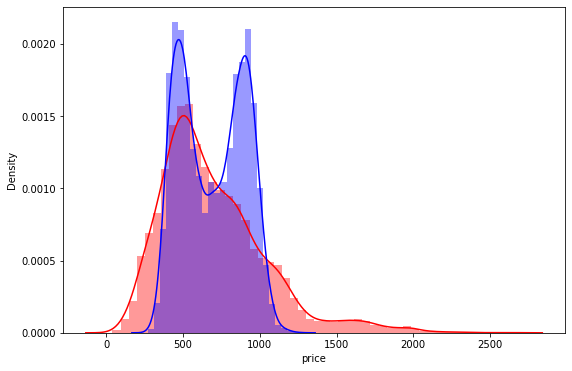

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y_test, label = 'y_test', color = 'red')
ax2 = sns.distplot(MR.predict(X_test), label = 'y_hat', color = 'blue')
plt.show()

## V. Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth = 5,
                            criterion ='mse',
                            random_state = 2045)

DTR.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2045, splitter='best')

* multivariate regression의 normalize 안 준 값보다 좋아짐

In [ ]:
mse = mean_squared_error(y_test, DTR.predict(X_test))
np.sqrt(mse)

205.83861035542535

In [ ]:
mae = mean_absolute_error(y_test, DTR.predict(X_test))
norm=(abs(y_test).sum())/len(y_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.21299236009754113


In [ ]:
DTR.feature_importances_

array([6.00654208e-03, 7.87893580e-05, 3.63809680e-04, 0.00000000e+00,
       0.00000000e+00, 1.54508972e-01, 3.24310399e-01, 0.00000000e+00,
       3.09395843e-01, 0.00000000e+00, 5.23572031e-02, 5.13184128e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

* kind, year, month, ratio, inn, out, rain_12, sun_10, sun_12

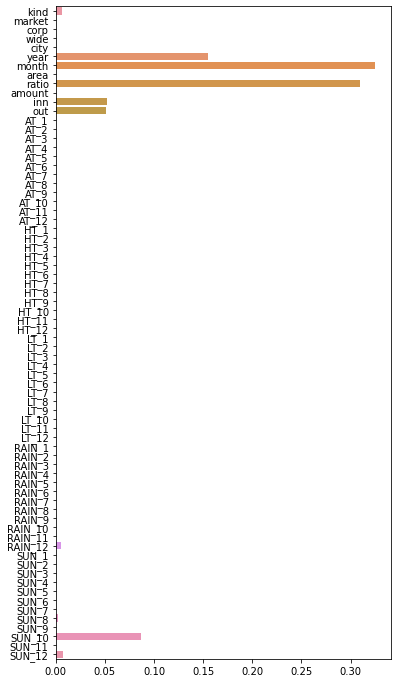

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (6, 12))
sns.barplot(DTR.feature_importances_, PATIW.iloc[:, 2:].columns)
plt.show()

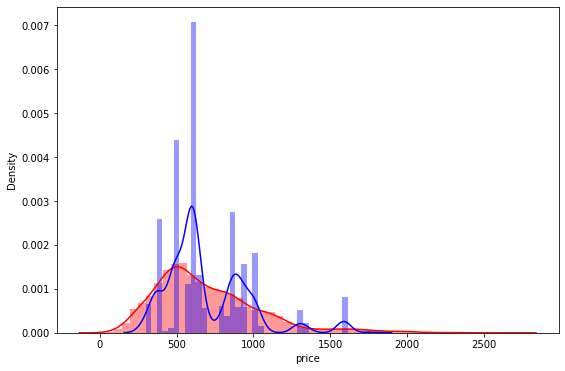

In [ ]:
plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y_test, label = 'y_test', color = 'red')
ax2 = sns.distplot(DTR.predict(X_test), label = 'y_hat', color = 'blue')
plt.show()

In [ ]:
PATIW.iloc[:, 2:].columns

Index(['kind', 'market', 'corp', 'wide', 'city', 'year', 'month', 'area',
       'ratio', 'amount', 'inn', 'out', 'AT_1', 'AT_2', 'AT_3', 'AT_4', 'AT_5',
       'AT_6', 'AT_7', 'AT_8', 'AT_9', 'AT_10', 'AT_11', 'AT_12', 'HT_1',
       'HT_2', 'HT_3', 'HT_4', 'HT_5', 'HT_6', 'HT_7', 'HT_8', 'HT_9', 'HT_10',
       'HT_11', 'HT_12', 'LT_1', 'LT_2', 'LT_3', 'LT_4', 'LT_5', 'LT_6',
       'LT_7', 'LT_8', 'LT_9', 'LT_10', 'LT_11', 'LT_12', 'RAIN_1', 'RAIN_2',
       'RAIN_3', 'RAIN_4', 'RAIN_5', 'RAIN_6', 'RAIN_7', 'RAIN_8', 'RAIN_9',
       'RAIN_10', 'RAIN_11', 'RAIN_12', 'SUN_1', 'SUN_2', 'SUN_3', 'SUN_4',
       'SUN_5', 'SUN_6', 'SUN_7', 'SUN_8', 'SUN_9', 'SUN_10', 'SUN_11',
       'SUN_12'],
      dtype='object')

## VI. Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators = 2000,
                            max_features = 9,
                            max_depth = 5,
                            criterion ='mse',
                            n_jobs = -1,
                            random_state = 2045)

RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=9, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=-1, oob_score=False,
                      random_state=2045, verbose=0, warm_start=False)

* multivariate regression 보다는 향상되었으나
* decision tree 보다는 낮아짐 
* max_feature를 제한해서 그럴 수도 있음

In [ ]:
mse = mean_squared_error(y_test, RFR.predict(X_test))
np.sqrt(mse)

225.77426297169075

In [ ]:
mae = mean_absolute_error(y_test, RFR.predict(X_test))
norm=(abs(y_test).sum())/len(y_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.24198211284591906


### max_depth = 5

* max_feature 설정 X

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFR1 = RandomForestRegressor(n_estimators = 2000,
                            max_depth = 5,
                            criterion ='mse',
                            n_jobs = -1,
                            random_state = 2045)

RFR1.fit(X_train, y_train)                        ## 2분 23초

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=-1, oob_score=False,
                      random_state=2045, verbose=0, warm_start=False)

* decision tree보다 성능 좋아짐

In [ ]:
mse = mean_squared_error(y_test, RFR1.predict(X_test))
np.sqrt(mse)

200.1127190117383

In [ ]:
mae = mean_absolute_error(y_test, RFR1.predict(X_test))
norm=(abs(y_test).sum())/len(y_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.2067276203027112


* kind, year, month, inn, out, sun_4, sun_10, sun_11

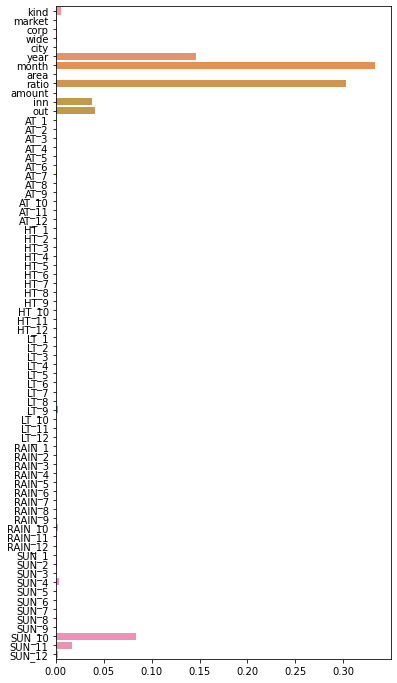

In [ ]:
plt.figure(figsize = (6, 12))
sns.barplot(RFR1.feature_importances_, PATIW.iloc[:, 2:].columns)
plt.show()

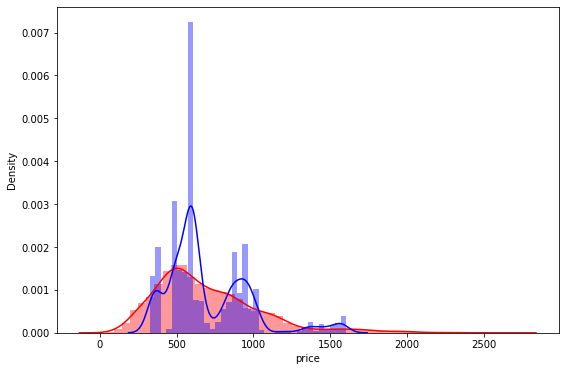

In [ ]:
plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y_test, label = 'y_test', color = 'red')
ax2 = sns.distplot(RFR1.predict(X_test), label = 'y_hat', color = 'blue')

### max_depth = 10

In [ ]:
import pandas as pd
PATIW = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/PATIW.csv')

In [ ]:
from sklearn.model_selection import train_test_split

X = PATIW.iloc[:, 2:]
y = PATIW.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (19032, 72) (19032,)
Test Data :  (4759, 72) (4759,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFR10 = RandomForestRegressor(n_estimators = 2000,
                            max_depth = 10,
                            criterion ='mse',
                            n_jobs = -1,
                            random_state = 2045)

RFR10.fit(X_train, y_train)                        ## 5분 56초

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=-1, oob_score=False,
                      random_state=2045, verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_score
scores_10 = cross_val_score(RFR10, X_train, y_train,
                         scoring = 'neg_mean_squared_error',
                         cv=5)
import numpy as np
np.sqrt(-scores_10.mean())

178.83978331523417

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, RFR10.predict(X_test))
np.sqrt(mse)

175.53167035041878

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, RFR10.predict(X_test))
norm=(abs(y_test).sum())/len(y_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.17243257353660937


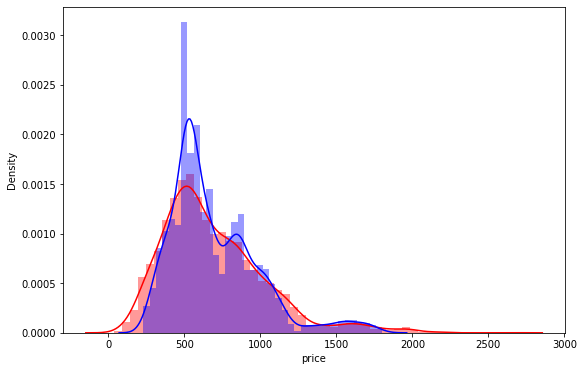

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y_test, label = 'y_test', color = 'red')
ax2 = sns.distplot(RFR10.predict(X_test), label = 'y_hat', color = 'blue')

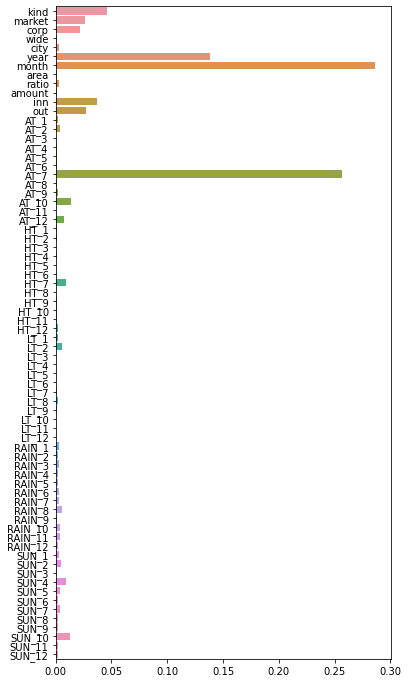

In [ ]:
plt.figure(figsize = (6, 12))
sns.barplot(RFR10.feature_importances_, PATIW.iloc[:, 2:].columns)
plt.show()

#### weather 제거

In [ ]:
PATIW.columns

Index(['price', 'weather', 'kind', 'market', 'corp', 'wide', 'city', 'year',
       'month', 'area', 'ratio', 'amount', 'inn', 'out', 'AT_1', 'AT_2',
       'AT_3', 'AT_4', 'AT_5', 'AT_6', 'AT_7', 'AT_8', 'AT_9', 'AT_10',
       'AT_11', 'AT_12', 'HT_1', 'HT_2', 'HT_3', 'HT_4', 'HT_5', 'HT_6',
       'HT_7', 'HT_8', 'HT_9', 'HT_10', 'HT_11', 'HT_12', 'LT_1', 'LT_2',
       'LT_3', 'LT_4', 'LT_5', 'LT_6', 'LT_7', 'LT_8', 'LT_9', 'LT_10',
       'LT_11', 'LT_12', 'RAIN_1', 'RAIN_2', 'RAIN_3', 'RAIN_4', 'RAIN_5',
       'RAIN_6', 'RAIN_7', 'RAIN_8', 'RAIN_9', 'RAIN_10', 'RAIN_11', 'RAIN_12',
       'SUN_1', 'SUN_2', 'SUN_3', 'SUN_4', 'SUN_5', 'SUN_6', 'SUN_7', 'SUN_8',
       'SUN_9', 'SUN_10', 'SUN_11', 'SUN_12'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

Xm = PATIW[['kind', 'market', 'corp', 'wide', 'city', 'year',
       'area', 'ratio', 'amount', 'inn', 'out', 'AT_1', 'AT_2',
       'AT_3', 'AT_4', 'AT_5', 'AT_6', 'AT_7', 'AT_8', 'AT_9', 'AT_10',
       'AT_11', 'AT_12', 'HT_1', 'HT_2', 'HT_3', 'HT_4', 'HT_5', 'HT_6',
       'HT_7', 'HT_8', 'HT_9', 'HT_10', 'HT_11', 'HT_12', 'LT_1', 'LT_2',
       'LT_3', 'LT_4', 'LT_5', 'LT_6', 'LT_7', 'LT_8', 'LT_9', 'LT_10',
       'LT_11', 'LT_12', 'RAIN_1', 'RAIN_2', 'RAIN_3', 'RAIN_4', 'RAIN_5',
       'RAIN_6', 'RAIN_7', 'RAIN_8', 'RAIN_9', 'RAIN_10', 'RAIN_11', 'RAIN_12',
       'SUN_1', 'SUN_2', 'SUN_3', 'SUN_4', 'SUN_5', 'SUN_6', 'SUN_7', 'SUN_8',
       'SUN_9', 'SUN_10', 'SUN_11', 'SUN_12']]
ym = PATIW.iloc[:, 0]

Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym,
                                                    test_size = 0.2,
                                                    random_state = 2045)

print('Train Data : ', Xm_train.shape, ym_train.shape)
print('Test Data : ', Xm_test.shape, ym_test.shape)

Train Data :  (19032, 71) (19032,)
Test Data :  (4759, 71) (4759,)


In [ ]:
RFR10.fit(Xm_train, ym_train)                        ## 2분 23초

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=-1, oob_score=False,
                      random_state=2045, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(ym_test, RFR10.predict(Xm_test))
np.sqrt(mse)

175.6165557826524

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(ym_test, RFR10.predict(Xm_test))
norm=(abs(ym_test).sum())/len(ym_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.169959049113043


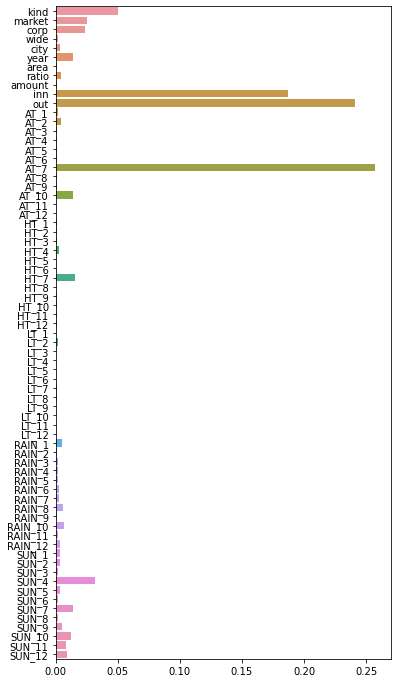

In [ ]:
plt.figure(figsize = (6, 12))
sns.barplot(RFR10.feature_importances_, Xm.columns)
plt.show()

### max_depth = 40

* train/test 비율 0.2로 낮춤
* cross-validation

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

RFR2 = RandomForestRegressor(n_estimators = 2000,
                            max_depth = 40,
                            criterion ='mse',
                            n_jobs = -1,
                            random_state = 2045)

In [ ]:
scores = cross_val_score(RFR2, X_train, y_train,
                         scoring = 'neg_mean_squared_error',
                         cv=5)
import numpy as np
np.sqrt(-scores.mean())

177.218465682413

In [ ]:
RFR2.fit(X_train, y_train)      # 10분

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=-1, oob_score=False,
                      random_state=2045, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, RFR2.predict(X_test))
np.sqrt(mse)

168.21970529729205

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, RFR2.predict(X_test))
norm=(abs(y_test).sum())/len(y_test)
nmae=mae/norm
print('nmae:', nmae)

nmae: 0.16378588731719881


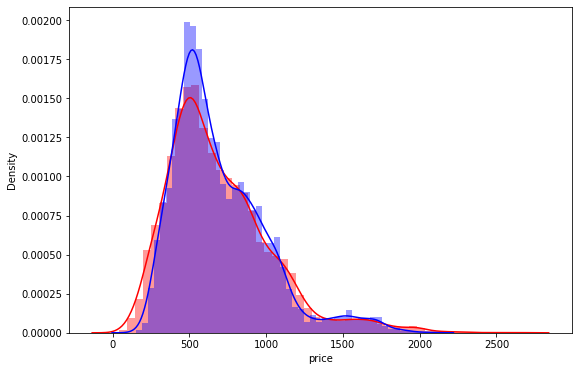

In [ ]:
plt.figure(figsize = (9, 6))
ax1 = sns.distplot(y_test, label = 'y_test', color = 'red')
ax2 = sns.distplot(RFR2.predict(X_test), label = 'y_hat', color = 'blue')

## permutation feature

In [ ]:
import pandas as pd
PATIW = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2nd project/PATIW.csv')

In [ ]:
PATIW.columns

Index(['price', 'weather', 'kind', 'market', 'corp', 'wide', 'city', 'year',
       'month', 'area', 'ratio', 'amount', 'inn', 'out', 'AT_1', 'AT_2',
       'AT_3', 'AT_4', 'AT_5', 'AT_6', 'AT_7', 'AT_8', 'AT_9', 'AT_10',
       'AT_11', 'AT_12', 'HT_1', 'HT_2', 'HT_3', 'HT_4', 'HT_5', 'HT_6',
       'HT_7', 'HT_8', 'HT_9', 'HT_10', 'HT_11', 'HT_12', 'LT_1', 'LT_2',
       'LT_3', 'LT_4', 'LT_5', 'LT_6', 'LT_7', 'LT_8', 'LT_9', 'LT_10',
       'LT_11', 'LT_12', 'RAIN_1', 'RAIN_2', 'RAIN_3', 'RAIN_4', 'RAIN_5',
       'RAIN_6', 'RAIN_7', 'RAIN_8', 'RAIN_9', 'RAIN_10', 'RAIN_11', 'RAIN_12',
       'SUN_1', 'SUN_2', 'SUN_3', 'SUN_4', 'SUN_5', 'SUN_6', 'SUN_7', 'SUN_8',
       'SUN_9', 'SUN_10', 'SUN_11', 'SUN_12'],
      dtype='object')

In [ ]:
len(PATIW.columns)

74

In [ ]:
feature_del= ['HT_2', 'HT_3', 'RAIN_4', 'HT_12', 'HT_1', 'LT_5' ,'RAIN_12' ,'RAIN_5' ,'SUN_6' ,'AT_4' ,'AT_8' ,'RAIN_1' ,'SUN_3' ,'AT_3' ,'LT_9' ,'SUN_12' ,'area' ,'SUN_8' ,'AT_6' ,'AT_5' ,'RAIN_9' ,'RAIN_2' ,'SUN_9']

len(feature_del)

23

In [ ]:
feature_del.extend(['AT_9', 'HT_11', 'HT_6', 'HT_5', 'LT_3', 'LT_7', 'HT_8', 'LT_4', 'LT_12', 'HT_4', 'LT_8'])

len(feature_del)

34

In [ ]:
feature_del.extend(['AT_11' ,'LT_6' ,'AT_2' ,'HT_9'])

len(feature_del)

38

In [ ]:
feature_del.extend(['LT_11' ,'LT_1' ,'LT_10'])

len(feature_del)

41

In [ ]:
feature_del.extend(['RAIN_11','weather'])

len(feature_del)

43

In [ ]:
feature_del.remove('area')

len(feature_del)

42

In [ ]:
PATIW.drop(columns=feature_del, inplace=True)
PATIW.columns

Index(['price', 'kind', 'market', 'corp', 'wide', 'city', 'year', 'month',
       'area', 'ratio', 'amount', 'inn', 'out', 'AT_1', 'AT_7', 'AT_10',
       'AT_12', 'HT_7', 'HT_10', 'LT_2', 'RAIN_3', 'RAIN_6', 'RAIN_7',
       'RAIN_8', 'RAIN_10', 'SUN_1', 'SUN_2', 'SUN_4', 'SUN_5', 'SUN_7',
       'SUN_10', 'SUN_11'],
      dtype='object')

In [ ]:
len(PATIW.columns)

32